# Predicting the Severity of Vehicle Accidents in Seattle.

## Table of Content
* [Introduction](#introduction)
* [Exploratory Data Analysis](#EDA)
* [Data Preprocessing](#data)
* [Machine Learning Models](#ML)
* [Model Evaluation](#ME)
* [Discussion](#discuss)
* [Policy Recommendation](#policy)
* [Conclusion](#conclude)

# Introduction <a name="introduction"></a>

The World Health Organisation (WHO) reports that about 20 to 50 million people suffer from non-fatal injuries from vehicle accidents globally every year. Some of the risk factors the WHO are speeding, driving under the influence of alcohol or other psychoactive substances, improper use of road safety equipment (helmet, seat belts etc.), distracting the driver, unsafe road infrastructure and so on. Also, the Center for Disease Control shows that every year in the United States, about 3 million people are involved in accidents that cause serious injury. In 2017, the cost to the US economy was huge at about \$75billion in medical care cost and lost productivity from vehicle accidents alone. The Seattle Department of Transportation’s annual traffic report show that there were 10,959 vehicle-related accidents reported by the police in 2017. The impact of vehicle accident on the economy and citizen's lives and property make it of interest to stakeholders and the government.

A comprehensive study that measures the risk factors and estimates how they predict the timing of road accidents will be of use to all parties involved. These include private citizens who bear the pain of the accidents; the cooperation and State government that bear the loss in productivity as a result of road accidents; and insurance companies that provide cover for road users. The objective of this project is to fill in the gap. Using data from road accidents in Seattle, we predict road accidents by considering some of the risk factors stated by the WHO and other factors provided by the police data on road accidents. The Washington State Department of Transport (WSDOT) reported that the common causes of accident specific to Seattle are speeding, intoxication, following cars too closely, defective equipment, poor vehicle maintenance and failure to yield right of way. The dataset we use to create a predictive model should measure these factors to a good extent to enable the algorithm learn and predict car accidents in out-of-sample data.

The remaining section of the project will introduce and explore the data, discuss the machine learning models implemented in the analysis, conduct test on the accuracy of models and recommend the best prediction model. Lastly, I provide some policy recommendations based on findings and conclude.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset 
df = pd.read_csv('Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
print(df.columns)
print('The Dimension of the dataset is ', df.shape)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')
The Dimension of the dataset is  (194673, 38)


# Exploratory Data Analysis <a name="EDA"></a>

In the exploration, I will discuss some of the pertinent features suggested by the World Health Organisation (WHO) and understand how they interact to determine accident severity. It is important to understand that the variable of interest is whether the accident resulted in the destruction of property or injury of a person. We should expect that the factors that determine these closely related outcomes will involve interaction between features. It is also worth noting that most of the features are categorical, therefore, the most appropriate way to have a first view of the data is using bar charts.

In [5]:
df.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts(normalize=True) 

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    1.0
2             Injury Collision                  1.0
Name: SEVERITYDESC, dtype: float64

In [6]:
df.groupby(['SEVERITYCODE']).WEATHER.value_counts()

SEVERITYCODE  WEATHER                 
1             Clear                       75295
              Raining                     21969
              Overcast                    18969
              Unknown                     14275
              Snowing                       736
              Other                         716
              Fog/Smog/Smoke                382
              Sleet/Hail/Freezing Rain       85
              Blowing Sand/Dirt              41
              Severe Crosswind               18
              Partly Cloudy                   2
2             Clear                       35840
              Raining                     11176
              Overcast                     8745
              Unknown                       816
              Fog/Smog/Smoke                187
              Snowing                       171
              Other                         116
              Sleet/Hail/Freezing Rain       28
              Blowing Sand/Dirt              15
 

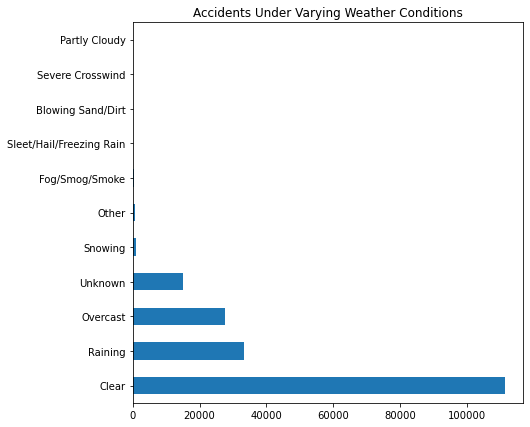

In [7]:
df['WEATHER'].value_counts().plot(kind='barh', figsize = (7, 7))
plt.title('Accidents Under Varying Weather Conditions')
plt.savefig('weather.jpg', bbox_inches = 'tight')

In [8]:
df['UNDERINFL'].value_counts()
df['UNDERINFL'].replace(to_replace = ['N', 'Y'], value = [0, 1], inplace = True)
df['UNDERINFL'] = pd.to_numeric(df['UNDERINFL'], errors='coerce')
df = df.dropna(subset=['UNDERINFL'])
df['UNDERINFL'] = df['UNDERINFL'].dropna()
df['UNDERINFL'] = df['UNDERINFL'].astype(int)

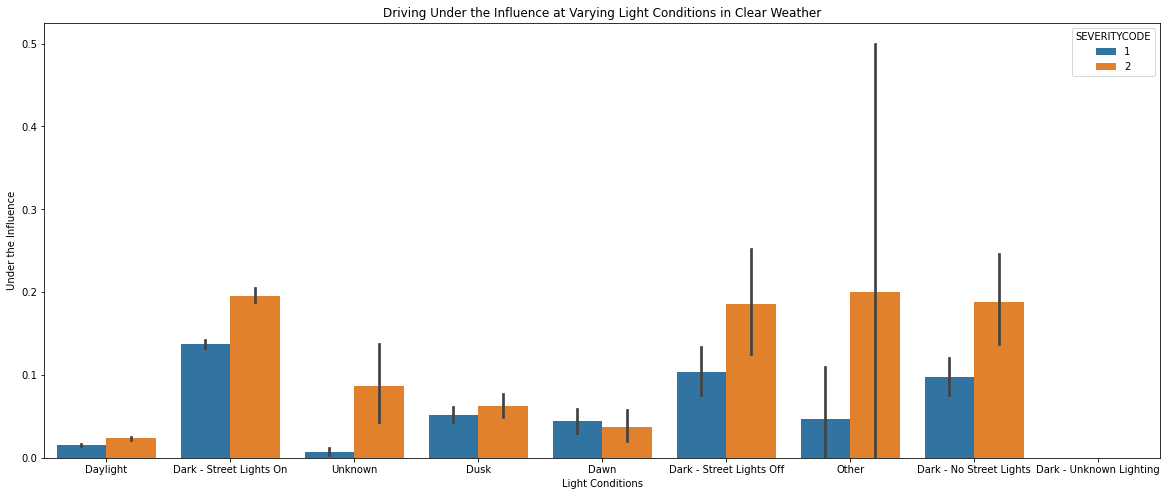

In [9]:
plt.figure(figsize=(20,8))
g = sns.barplot(x='LIGHTCOND', y='UNDERINFL', hue='SEVERITYCODE', data = df[df['WEATHER']=='Clear'])
#plt.show()
plt.title('Driving Under the Influence at Varying Light Conditions in Clear Weather')
plt.ylabel('Under the Influence')
plt.xlabel('Light Conditions')
plt.savefig('li_un_wet.jpg', bbox_inches = 'tight')

In [10]:
df['SPEEDING'] = df['SPEEDING'].fillna('N')
df['SPEEDING'].replace(to_replace = ['N', 'Y'], value = [0, 1], inplace = True)

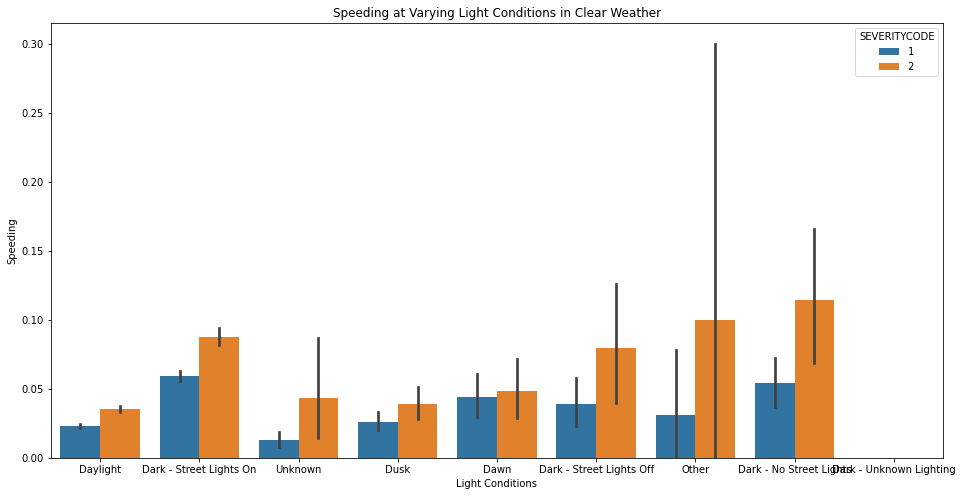

In [11]:
plt.figure(figsize=(16,8))
g = sns.barplot(x='LIGHTCOND', y='SPEEDING', hue='SEVERITYCODE', data = df[df['WEATHER']=='Clear'])
plt.title('Speeding at Varying Light Conditions in Clear Weather')
plt.ylabel('Speeding')
plt.xlabel('Light Conditions')
#plt.show()
plt.savefig('li_sp_wet.jpg', bbox_inches = 'tight')

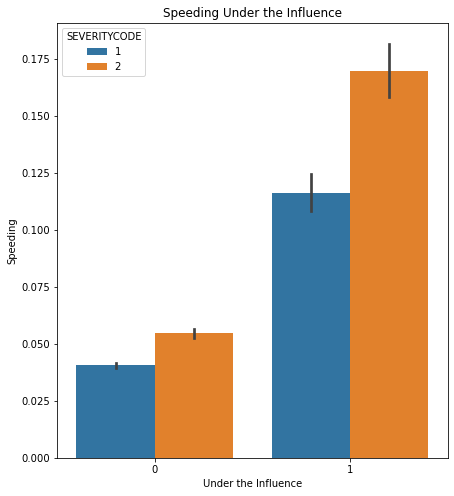

In [12]:
plt.figure(figsize=(7,8))
g = sns.barplot(x='UNDERINFL', y='SPEEDING', hue = 'SEVERITYCODE', data = df)
plt.title('Speeding Under the Influence')
plt.ylabel('Speeding')
plt.xlabel('Under the Influence')
#plt.show()
plt.savefig('un_sp_sev.jpg', bbox_inches = 'tight')

<Figure size 432x504 with 0 Axes>

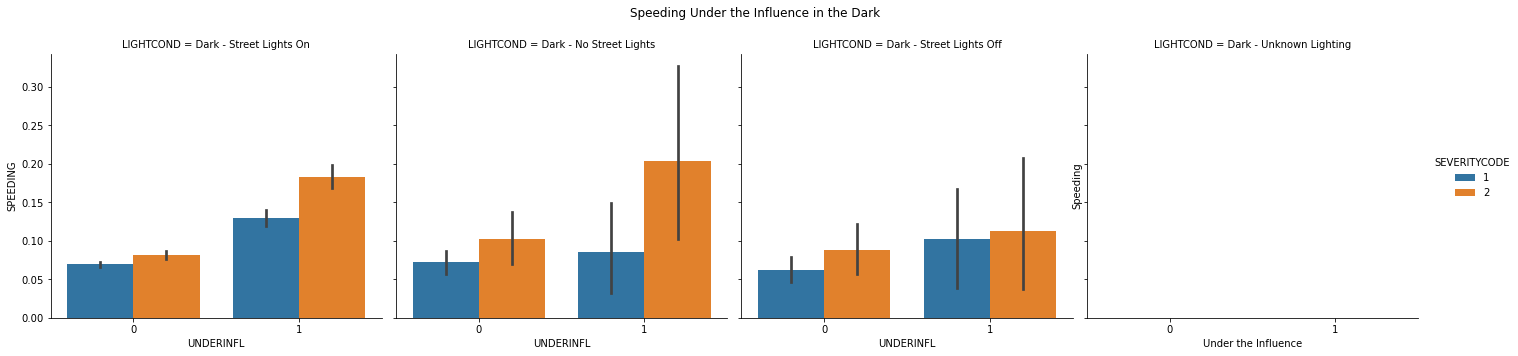

In [13]:
plt.figure(figsize=(6,7))
g = sns.catplot(x='UNDERINFL', y='SPEEDING', hue='SEVERITYCODE', col='LIGHTCOND', kind='bar', data = df[df['LIGHTCOND'].str.contains('Dark')==True])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Speeding Under the Influence in the Dark')
plt.xlabel('Under the Influence')
plt.ylabel('Speeding')
#plt.show()
plt.savefig('un_sp_sev_lig.jpg', bbox_inches = 'tight')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


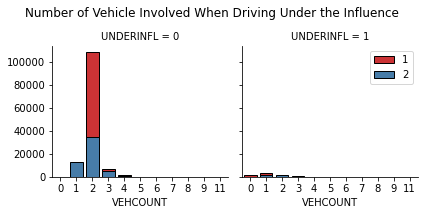

In [14]:
bins = np.linspace(df.VEHCOUNT.min(), df.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df, col="UNDERINFL", hue='SEVERITYCODE', palette="Set1", col_wrap=2)
g.map(sns.countplot, 'VEHCOUNT', ec="k")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Number of Vehicle Involved When Driving Under the Influence')
g.axes[-1].legend()
#plt.show()
plt.savefig('un_sev_hist.jpg', bbox_inches = 'tight')

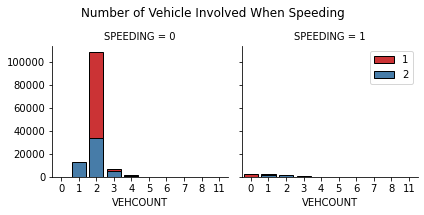

In [15]:
bins = np.linspace(df.VEHCOUNT.min(), df.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df, col="SPEEDING", hue='SEVERITYCODE', palette="Set1", col_wrap=2)
g.map(sns.countplot, 'VEHCOUNT', ec="k")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Number of Vehicle Involved When Speeding')
g.axes[-1].legend()
#plt.show()
plt.savefig('sp_sev_hist.jpg', bbox_inches = 'tight')

## Data Preprocessing <a name="data"></a>

This section discusses the transformation of categorical features in the dataset. I use three methods of categorical variable encoding that suits the feature based on the number of levels in the variable. The methods executed as follows :-

In [16]:
col_df = df[['SEVERITYCODE', 'SEVERITYDESC', 'LOCATION', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLDESC', 'HITPARKEDCAR']]
col_df.head()

,SEVERITYCODE,SEVERITYDESC,LOCATION,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC,HITPARKEDCAR
0,2,Injury Collision,5TH AVE NE AND NE 103RD ST,Intersection,Angles,2,2,At Intersection (intersection related),0,Overcast,Wet,Daylight,0,Entering at angle,N
1,1,Property Damage Only Collision,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Block,Sideswipe,2,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,From same direction - both going straight - bo...,N
2,1,Property Damage Only Collision,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Block,Parked Car,4,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,One parked--one moving,N
3,1,Property Damage Only Collision,2ND AVE BETWEEN MARION ST AND MADISON ST,Block,Other,3,3,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,0,From same direction - all others,N
4,2,Injury Collision,SWIFT AVE S AND SWIFT AV OFF RP,Intersection,Angles,2,2,At Intersection (intersection related),0,Raining,Wet,Daylight,0,Entering at angle,N


In [17]:
col_df['SEVERITYCODE'].replace(to_replace = [2, 1], value = [1, 0], inplace =True)
col_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,SEVERITYCODE,SEVERITYDESC,LOCATION,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC,HITPARKEDCAR
0,1,Injury Collision,5TH AVE NE AND NE 103RD ST,Intersection,Angles,2,2,At Intersection (intersection related),0,Overcast,Wet,Daylight,0,Entering at angle,N
1,0,Property Damage Only Collision,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Block,Sideswipe,2,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,From same direction - both going straight - bo...,N
2,0,Property Damage Only Collision,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Block,Parked Car,4,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,One parked--one moving,N
3,0,Property Damage Only Collision,2ND AVE BETWEEN MARION ST AND MADISON ST,Block,Other,3,3,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,0,From same direction - all others,N
4,1,Injury Collision,SWIFT AVE S AND SWIFT AV OFF RP,Intersection,Angles,2,2,At Intersection (intersection related),0,Raining,Wet,Daylight,0,Entering at angle,N


In [18]:
print(col_df['ADDRTYPE'].value_counts())
col_df = pd.concat([col_df, pd.get_dummies(col_df['ADDRTYPE'], prefix='ADDR')], axis=1)
col_df.drop(['ADDRTYPE', 'ADDR_Alley'], axis=1, inplace=True)
col_df.head()

Block           123664
Intersection     63559
Alley              747
Name: ADDRTYPE, dtype: int64


,SEVERITYCODE,SEVERITYDESC,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC,HITPARKEDCAR,ADDR_Block,ADDR_Intersection
0,1,Injury Collision,5TH AVE NE AND NE 103RD ST,Angles,2,2,At Intersection (intersection related),0,Overcast,Wet,Daylight,0,Entering at angle,N,0,1
1,0,Property Damage Only Collision,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,From same direction - both going straight - bo...,N,1,0
2,0,Property Damage Only Collision,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,One parked--one moving,N,1,0
3,0,Property Damage Only Collision,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,3,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,0,From same direction - all others,N,1,0
4,1,Injury Collision,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,At Intersection (intersection related),0,Raining,Wet,Daylight,0,Entering at angle,N,0,1


In [19]:
#frequency
print(col_df['COLLISIONTYPE'].value_counts())
col_freq = col_df.groupby(['COLLISIONTYPE']).size()/len(col_df)
print(col_freq)
col_df['COLLISIONFREQ'] = col_df['COLLISIONTYPE'].map(col_freq)
col_df[['COLLISIONTYPE', 'COLLISIONFREQ']].head()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6607
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64
COLLISIONTYPE
Angles        0.182698
Cycles        0.028532
Head On       0.010664
Left Turn     0.072201
Other         0.124891
Parked Car    0.252844
Pedestrian    0.034812
Rear Ended    0.179621
Right Turn    0.015575
Sideswipe     0.098051
dtype: float64


,COLLISIONTYPE,COLLISIONFREQ
0,Angles,0.182698
1,Sideswipe,0.098051
2,Parked Car,0.252844
3,Other,0.124891
4,Angles,0.182698


In [20]:
#frequency
print(col_df['ST_COLDESC'].value_counts().head())
ST_freq = col_df.groupby(['ST_COLDESC'])['SEVERITYCODE'].size()/len(col_df)
print(ST_freq.value_counts().head())
col_df['ST_freq'] = col_df['ST_COLDESC'].map(ST_freq)
col_df[['ST_COLDESC', 'ST_freq']].head()

One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
Name: ST_COLDESC, dtype: int64
0.000005    3
0.000058    3
0.000011    2
0.000047    2
0.000263    1
Name: SEVERITYCODE, dtype: int64


,ST_COLDESC,ST_freq
0,Entering at angle,0.182698
1,From same direction - both going straight - bo...,0.067322
2,One parked--one moving,0.234055
3,From same direction - all others,0.023905
4,Entering at angle,0.182698


In [21]:
# frequency
print(col_df['HITPARKEDCAR'].value_counts())
col_df['HITPARKEDCAR'].replace(to_replace = ['N', 'Y'], value = [0, 1], inplace=True)
print(col_df['HITPARKEDCAR'].value_counts())

N    182871
Y      6918
Name: HITPARKEDCAR, dtype: int64
0    182871
1      6918
Name: HITPARKEDCAR, dtype: int64


In [22]:
#probability
print(col_df['LOCATION'].value_counts())
pr_loc = col_df.groupby('LOCATION')['SEVERITYCODE'].mean()
pr_loc = pd.DataFrame(pr_loc)
pr_loc = pr_loc.rename(columns={'SEVERITYCODE' : 'YES'})
pr_loc['NO'] = 1- pr_loc['YES']

pr_loc['NO'] = np.where(pr_loc['NO']==0, 0.000001, pr_loc['NO'])
pr_loc['ODDS'] = pr_loc['YES']/pr_loc['NO']
print(pr_loc.head())

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    274
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    268
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          260
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    247
6TH AVE AND JAMES ST                                              242
                                                                 ... 
NE 93RD ST BETWEEN 49TH AVE NE AND 51ST AVE NE                      1
29TH AVE W AND W RAYE ST                                            1
1ST AVE N BETWEEN PROSPECT N ST AND HIGHLAND S DR                   1
24TH AVE W BETWEEN 24 UPPER AVE W AND W RUFFNER ST                  1
S DAWSON ST BETWEEN BEACON ER AVE S AND 24TH AVE S                  1
Name: LOCATION, Length: 23956, dtype: int64
                                  YES        NO      ODDS
LOCATION                                                 
10TH AVE AND E ALDER ST      0.000000  1.000000  0.000000
10TH AVE AND

In [23]:
col_df['LOCATION_ODDS'] = col_df['LOCATION'].map(pr_loc['ODDS'])
col_df[['LOCATION', 'LOCATION_ODDS']].head()

,LOCATION,LOCATION_ODDS
0,5TH AVE NE AND NE 103RD ST,0.937500
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,0.504132
2,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,0.111111
3,2ND AVE BETWEEN MARION ST AND MADISON ST,0.315789
4,SWIFT AVE S AND SWIFT AV OFF RP,0.421053


In [24]:
#frequency
print(col_df['JUNCTIONTYPE'].value_counts())
junc_freq = col_df.groupby(['JUNCTIONTYPE']).size()/len(col_df)
print(junc_freq)
col_df['JUNCTION_FREQ'] = col_df['JUNCTIONTYPE'].map(junc_freq)
col_df[['JUNCTIONTYPE', 'JUNCTION_FREQ']].head()

Mid-Block (not related to intersection)              87121
At Intersection (intersection related)               61335
Mid-Block (but intersection related)                 22388
Driveway Junction                                    10538
At Intersection (but not related to intersection)     2060
Ramp Junction                                          162
Unknown                                                  7
Name: JUNCTIONTYPE, dtype: int64
JUNCTIONTYPE
At Intersection (but not related to intersection)    0.010854
At Intersection (intersection related)               0.323175
Driveway Junction                                    0.055525
Mid-Block (but intersection related)                 0.117963
Mid-Block (not related to intersection)              0.459041
Ramp Junction                                        0.000854
Unknown                                              0.000037
dtype: float64


,JUNCTIONTYPE,JUNCTION_FREQ
0,At Intersection (intersection related),0.323175
1,Mid-Block (not related to intersection),0.459041
2,Mid-Block (not related to intersection),0.459041
3,Mid-Block (not related to intersection),0.459041
4,At Intersection (intersection related),0.323175


In [25]:
# frequency
print(col_df['WEATHER'].value_counts())
weath_freq = col_df.groupby(['WEATHER']).size()/len(col_df)
print(weath_freq)
col_df['WEATHER_FREQ'] = col_df['WEATHER'].map(weath_freq)
col_df[['WEATHER', 'WEATHER_FREQ']].head()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
WEATHER
Blowing Sand/Dirt           0.000295
Clear                       0.585571
Fog/Smog/Smoke              0.002998
Other                       0.004384
Overcast                    0.146025
Partly Cloudy               0.000026
Raining                     0.174641
Severe Crosswind            0.000132
Sleet/Hail/Freezing Rain    0.000595
Snowing                     0.004779
Unknown                     0.079515
dtype: float64


,WEATHER,WEATHER_FREQ
0,Overcast,0.146025
1,Raining,0.174641
2,Overcast,0.146025
3,Clear,0.585571
4,Raining,0.174641


In [26]:
# probability
print(col_df['ROADCOND'].value_counts())
road_pr = col_df.groupby(['ROADCOND'])['SEVERITYCODE'].mean()
road_pr = pd.DataFrame(road_pr)
road_pr.rename(columns = {'SEVERITYCODE' : 'YES'}, inplace = True)
road_pr['NO'] = 1-road_pr['YES']
road_pr['NO'] = np.where(road_pr['NO']==0, 0.000001, road_pr['NO'])
road_pr['ROAD_ODDS'] = road_pr['YES']/road_pr['NO']
print(road_pr.head())

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
                    YES        NO  ROAD_ODDS
ROADCOND                                    
Dry            0.321773  0.678227   0.474433
Ice            0.225806  0.774194   0.291667
Oil            0.375000  0.625000   0.600000
Other          0.325758  0.674242   0.483146
Sand/Mud/Dirt  0.306667  0.693333   0.442308


In [27]:
col_df['ROAD_ODDS'] = col_df['ROADCOND'].map(road_pr['ROAD_ODDS'])
col_df[['ROADCOND', 'ROAD_ODDS']].head()

,ROADCOND,ROAD_ODDS
0,Wet,0.496705
1,Wet,0.496705
2,Dry,0.474433
3,Dry,0.474433
4,Wet,0.496705


In [28]:
#probability
print(col_df['LIGHTCOND'].value_counts())
light_pr = col_df.groupby(['LIGHTCOND'])['SEVERITYCODE'].mean()
light_pr = pd.DataFrame(light_pr)
light_pr = light_pr.rename(columns = {'SEVERITYCODE' : 'YES'})
light_pr['NO'] = 1 - light_pr['YES']
light_pr['NO'] = np.where(light_pr['NO']==0, 0.000001, light_pr['NO'])
light_pr['LIGHT_ODDS'] = light_pr['YES']/light_pr['NO']
light_pr.head()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


,YES,NO,LIGHT_ODDS
LIGHTCOND,,,
Dark - No Street Lights,0.217306,0.782694,0.277639
Dark - Street Lights Off,0.263553,0.736447,0.357871
Dark - Street Lights On,0.298411,0.701589,0.425335
Dark - Unknown Lighting,0.363636,0.636364,0.571429
Dawn,0.329337,0.670663,0.491061


In [29]:
col_df['LIGHT_ODDS'] = col_df['LIGHTCOND'].map(light_pr['LIGHT_ODDS'])
col_df[['LIGHTCOND', 'LIGHT_ODDS']].head()

,LIGHTCOND,LIGHT_ODDS
0,Daylight,0.496746
1,Dark - Street Lights On,0.425335
2,Daylight,0.496746
3,Daylight,0.496746
4,Daylight,0.496746


In [30]:
print(col_df['SPEEDING'].isna().value_counts())
print(col_df['SPEEDING'].value_counts())
col_df['SPEEDING'] = col_df['SPEEDING'].fillna('N')
col_df['SPEEDING'].value_counts()

False    189789
Name: SPEEDING, dtype: int64
0    180456
1      9333
Name: SPEEDING, dtype: int64


0    180456
1      9333
Name: SPEEDING, dtype: int64

In [31]:
col_df = pd.concat([col_df, pd.get_dummies(col_df['SPEEDING'], prefix = 'SPEED')], axis=1)
col_df.head()

,SEVERITYCODE,SEVERITYDESC,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,...,ADDR_Intersection,COLLISIONFREQ,ST_freq,LOCATION_ODDS,JUNCTION_FREQ,WEATHER_FREQ,ROAD_ODDS,LIGHT_ODDS,SPEED_0,SPEED_1
0,1,Injury Collision,5TH AVE NE AND NE 103RD ST,Angles,2,2,At Intersection (intersection related),0,Overcast,Wet,...,1,0.182698,0.182698,0.937500,0.323175,0.146025,0.496705,0.496746,1,0
1,0,Property Damage Only Collision,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,2,Mid-Block (not related to intersection),0,Raining,Wet,...,0,0.098051,0.067322,0.504132,0.459041,0.174641,0.496705,0.425335,1,0
2,0,Property Damage Only Collision,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,3,Mid-Block (not related to intersection),0,Overcast,Dry,...,0,0.252844,0.234055,0.111111,0.459041,0.146025,0.474433,0.496746,1,0
3,0,Property Damage Only Collision,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,3,Mid-Block (not related to intersection),0,Clear,Dry,...,0,0.124891,0.023905,0.315789,0.459041,0.585571,0.474433,0.496746,1,0
4,1,Injury Collision,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,At Intersection (intersection related),0,Raining,Wet,...,1,0.182698,0.182698,0.421053,0.323175,0.174641,0.496705,0.496746,1,0


In [32]:
col_df.columns

Index(['SEVERITYCODE', 'SEVERITYDESC', 'LOCATION', 'COLLISIONTYPE',
       'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLDESC', 'HITPARKEDCAR',
       'ADDR_Block', 'ADDR_Intersection', 'COLLISIONFREQ', 'ST_freq',
       'LOCATION_ODDS', 'JUNCTION_FREQ', 'WEATHER_FREQ', 'ROAD_ODDS',
       'LIGHT_ODDS', 'SPEED_0', 'SPEED_1'],
      dtype='object')

In [33]:
col_df.dropna(inplace=True)

In [34]:
desc = col_df[['SEVERITYCODE', 'SEVERITYDESC', 'LOCATION', 'COLLISIONTYPE',
       'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ADDR_Block', 'ADDR_Intersection',
       'COLLISIONFREQ', 'JUNCTION_FREQ', 'WEATHER_FREQ',
       'ROAD_ODDS', 'LIGHT_ODDS', 'ST_freq', 'HITPARKEDCAR']].describe().loc[['count', 'mean', 'std', 'min', 'max']].T

In [35]:
print(desc.round(2))

                      count  mean   std   min    max
SEVERITYCODE       182660.0  0.31  0.46  0.00   1.00
PERSONCOUNT        182660.0  2.48  1.37  0.00  81.00
VEHCOUNT           182660.0  1.97  0.56  0.00  12.00
UNDERINFL          182660.0  0.05  0.22  0.00   1.00
SPEEDING           182660.0  0.05  0.22  0.00   1.00
ADDR_Block         182660.0  0.65  0.48  0.00   1.00
ADDR_Intersection  182660.0  0.35  0.48  0.00   1.00
COLLISIONFREQ      182660.0  0.16  0.07  0.01   0.25
JUNCTION_FREQ      182660.0  0.34  0.14  0.00   0.46
WEATHER_FREQ       182660.0  0.41  0.22  0.00   0.59
ROAD_ODDS          182660.0  0.45  0.11  0.05   0.60
LIGHT_ODDS         182660.0  0.45  0.11  0.05   0.57
ST_freq            182660.0  0.12  0.08  0.00   0.23
HITPARKEDCAR       182660.0  0.03  0.17  0.00   1.00


In [36]:
X = col_df[['PERSONCOUNT', 'VEHCOUNT', 'UNDERINFL', 'ADDR_Block', 'ADDR_Intersection', 'COLLISIONFREQ', 'LOCATION_ODDS', 'JUNCTION_FREQ', 'WEATHER_FREQ', 'ROAD_ODDS', 'LIGHT_ODDS', 'ST_freq', 'HITPARKEDCAR']]
y = col_df[['SEVERITYCODE']]
X.head()

,PERSONCOUNT,VEHCOUNT,UNDERINFL,ADDR_Block,ADDR_Intersection,COLLISIONFREQ,LOCATION_ODDS,JUNCTION_FREQ,WEATHER_FREQ,ROAD_ODDS,LIGHT_ODDS,ST_freq,HITPARKEDCAR
0,2,2,0,0,1,0.182698,0.937500,0.323175,0.146025,0.496705,0.496746,0.182698,0
1,2,2,0,1,0,0.098051,0.504132,0.459041,0.174641,0.496705,0.425335,0.067322,0
2,4,3,0,1,0,0.252844,0.111111,0.459041,0.146025,0.474433,0.496746,0.234055,0
3,3,3,0,1,0,0.124891,0.315789,0.459041,0.585571,0.474433,0.496746,0.023905,0
4,2,2,0,0,1,0.182698,0.421053,0.323175,0.174641,0.496705,0.496746,0.182698,0


In [37]:
import matplotlib.pyplot as plt

In [38]:
X = X.values
y = y.values

In [39]:
from sklearn.preprocessing import PolynomialFeatures
Xpoly = PolynomialFeatures(degree=3).fit_transform(X)

In [40]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
Xpoly = preprocessing.StandardScaler().fit(Xpoly).transform(Xpoly)

In [41]:
Xpoly_new = SelectKBest(f_regression, k=13).fit_transform(Xpoly, y.ravel())
print(Xpoly_new.shape)
print(Xpoly_new[0:5])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


(182660, 13)
[[ 0.31743298 -1.14327471 -0.89992903  0.12561255 -1.14327471 -0.89992903
  -0.93262733 -0.93074138 -0.77221866 -0.76640539 -0.71439925 -0.05017157
  -0.03665753]
 [-0.8851484  -0.16821311 -0.17230113 -0.97569311 -0.16821311 -0.17230113
  -0.54829215  0.05229338 -0.48681805 -0.01287923 -0.50541587 -0.92862907
  -0.65413848]
 [ 1.31400727  1.37111516  1.62976955  1.54145542  1.37111516  1.62976955
   1.62308092  1.60420886  1.78645502  1.85333207  1.81158489  1.66502746
   1.76133674]
 [-0.50382567  0.0986988  -0.64155478 -0.69838602  0.0986988  -0.64155478
  -0.30907816  0.32138785 -0.64313387 -0.49883489 -0.68804859 -0.75732108
  -0.38803245]
 [ 0.31743298 -1.14327471 -0.89992903  0.12561255 -1.14327471 -0.89992903
  -0.93262733 -0.93074138 -0.77221866 -0.76640539 -0.71439925 -0.05017157
  -0.03665753]]


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4)
xp_train, xp_test, y_train, y_test = train_test_split(Xpoly, y, test_size = 0.3, random_state=4)

In [43]:
xp_trainnew, xp_testnew, y_train, y_test = train_test_split(Xpoly_new, y, test_size = 0.3, random_state=4)

In [44]:
print('The dimension of the linear training set is:', x_train.shape)
print('The dimension of the linear test set is:', x_test.shape)
print('The dimension of the polynomial training set is:', xp_train.shape)
print('The dimension of the polynomial tesr set is:', xp_test.shape)

The dimension of the linear training set is: (127862, 13)
The dimension of the linear test set is: (54798, 13)
The dimension of the polynomial training set is: (127862, 560)
The dimension of the polynomial tesr set is: (54798, 560)


# Machine Learning Algorithm <a name="ML"></a>

To predict the severity of accidents, I employ 3 supervised machine learning algorithm. The models are supervised because the target labels are known as either accident causing property damage and accidents causing injury as 0 and 1 respectively. As opposed to regression analysis used in cases of continuous target, I use these classification models that are appropriate for discrete target labels. The three machine learning algorithms are K-Nearest Neighbour (KNN), Decision Tree classification and Logistic model.

## K-Nearest Neighbour

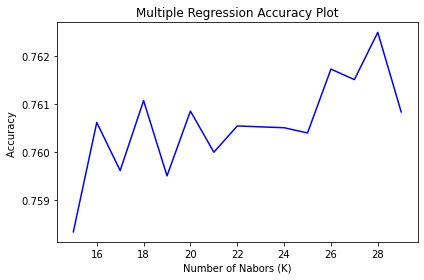

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knum = list(range(15, 30))
err_val=[]

for k in knum:
    k_near = KNeighborsClassifier(n_neighbors = k)
    k_near.fit(x_train, y_train.flatten())
    err_val.append(metrics.accuracy_score(y_test, k_near.predict(x_test)))
    
plt.plot(knum, err_val, 'b')
plt.title("Multiple Regression Accuracy Plot")
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
#plt.show()
plt.savefig('KNN.jpg', bbox_inches = 'tight')

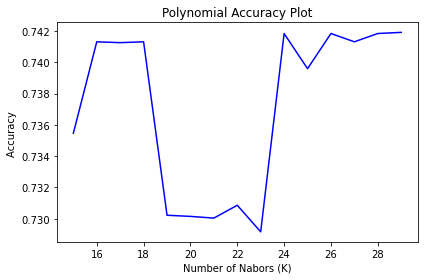

In [47]:
knum = list(range(15, 30))
err_val=[]

for k in knum:
    k_nearpoly = KNeighborsClassifier(n_neighbors = k)
    k_nearpoly.fit(xp_trainnew, y_train.flatten())
    err_val.append(metrics.accuracy_score(y_test, k_nearpoly.predict(xp_testnew)))
    
plt.plot(knum, err_val, 'b')
plt.title("Polynomial Accuracy Plot")
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
#plt.show()
plt.savefig('kNN_poly.jpg', bbox_inches = 'tight')

## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
desTree1 = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
desTree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 20)

desTree1.fit(x_train, y_train)
y_hat = desTree1.predict(x_test)

desTree2.fit(xp_train, y_train)
yp_hat = desTree2.predict(xp_test)

print('R2 in linear regression %.2f' % metrics.accuracy_score(y_test, y_hat))
print('R2 for polynomial features %.2f' % metrics.accuracy_score(y_test, yp_hat))

R2 in linear regression 0.76
R2 for polynomial features 0.76


## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score

In [50]:
LR1 = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train.flatten())
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(xp_train,y_train.flatten())

print('Linear regression %.2f' % jaccard_similarity_score(y_test, LR1.predict(x_test)))
print('Polynomial features %.2f' % jaccard_similarity_score(y_test, LR2.predict(xp_test)))

Linear regression 0.72
Polynomial features 0.75


# Model Evaluation <a name="ME"></a>

In [51]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## Evaluation of linear features KNN classifier

In [52]:
print('Jaccard for KNN %.2f' % jaccard_similarity_score(y_test, k_near.predict(x_test)))
print('Jaccard for DecisionTree %.2f' % jaccard_similarity_score(y_test, desTree1.predict(x_test)))
print('Jaccard for logit %.2f' % jaccard_similarity_score(y_test, LR1.predict(x_test)))

Jaccard for KNN 0.76
Jaccard for DecisionTree 0.76
Jaccard for logit 0.72


In [53]:
print ('f1 score for KNN %.2f' % f1_score(y_test, k_near.predict(x_test), average='weighted'))
print ('f1 score for Decision Tree %.2f' % f1_score(y_test, desTree1.predict(x_test), average='weighted'))
print ('f1 score for logit %.2f' % f1_score(y_test, LR1.predict(x_test), average='weighted'))

f1 score for KNN 0.75
f1 score for Decision Tree 0.74
f1 score for logit 0.68


In [54]:
print('log loss for logit is %.2f' % log_loss(y_test, LR1.predict_proba(x_test)))

log loss for logit is 0.55


## Evaluation of polynomial features KNN classifier

In [55]:
print('Jaccard for KNN %.2f' % jaccard_similarity_score(y_test, k_nearpoly.predict(xp_testnew)))
print('Jaccard for DecisionTree %.2f' % jaccard_similarity_score(y_test, desTree2.predict(xp_test)))
print('Jaccard for logit %.2f' % jaccard_similarity_score(y_test, LR2.predict(xp_test)))

Jaccard for KNN 0.74
Jaccard for DecisionTree 0.76
Jaccard for logit 0.75


In [56]:
print ('f1 score for KNN %.2f' % f1_score(y_test, k_nearpoly.predict(xp_testnew), average='weighted'))
print ('f1 score for Decision Tree %.2f' % f1_score(y_test, desTree2.predict(xp_test), average='weighted'))
print ('f1 score for logit %.2f' % f1_score(y_test, LR2.predict(xp_test), average='weighted'))

f1 score for KNN 0.68
f1 score for Decision Tree 0.74
f1 score for logit 0.71


In [57]:
print('log loss for logit is %.2f' % log_loss(y_test, LR2.predict_proba(xp_test)))

log loss for logit is 0.50


## Report 

| Algorithm            | Jaccard  | F1-score | LogLoss |
|----------------------|----------|----------|---------|
| **KNN** **(Linear)** | **0.76** | **0.75** | **NA**  |
|                (Poly)| 0.74     | 0.68     | NA      |
| Decision Tree(Linear)| 0.76     | 0.74     | NA      |
|              (Poly)  | 0.76     | 0.74     | NA      |
| Logistic     (Linear)| 0.72     | 0.68     | 0.55    |
|               (Poly) | 0.75     | 0.71     | 0.50    |

# Discussion <a name="discuss"></a>

The research provides some insights into the predictors of the severity of car accidents. The data exploration shows that most accidents in Seattle occur in clear weather conditions. Majority of the accidents occurred at night in the dark and the absence of street lights. The accident causing effect of street light is even more prominent when drivers are speeding and under the influence of psychoactive substances. Drivers speeding under the influence of drugs in a dark street contributes substantially to the occurrence of accidents that results in injury.

The research also created a model that predicts car accidents severity using the available features collected from the SDOT dataset. The machine learning model that best predicts accident severity is the K-Nearest Neighbour with K=20 and linear features which excludes interactive effects.

# Policy Recommendation <a name="policy"></a>
From the discussion and the results I give the following recommendations to the government. First, the need to provide street lights in prominent roads seems essential to reduce the incident of vehicular accidents in general. Also the government needs to educate the public on the dangers of speeding and using psychoactive substances while driving. An increase in fines and the number of law enforcement officers checking driver's state of consciousness while driving will decrease these behaviour on the streets of Seattle.

# Conclusion <a name="conclusion"></a>
This project uses machine learning algorithms to predict the severity of car accident. More specifically, I distinguish between accidents that destroy properties and accidents that lead to injury. Some of the features of interests are weather condition, driving under the influence, the type of address location (block, intersection or alley), collision type (angle, sideways, rear ended etc.), location of the accidents, the type of junction, road condition, the light condition, speeding, the number of people and the number of vehicle involved in the accident. I conduct an exploratory data analysis to determine the important features that can distinguish between accident severity types. Importantly, I find that speeding under the influence of psychoactive substances in dark road conditions contributed the most to accidents that result in injury. After the EDA, I specify three machine learning models | K-nearest neighbour, Decision tree and Logistic model. The KNN with linear features and k=20 performed best among other specifications in predicting accident severity in Seattle.
